#Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv(r'/content/drive/MyDrive/PM10_Prediction/processed_data.csv',encoding='utf-8')

In [ ]:
df.head()

,Unnamed: 0,Avg temp,Max temp,Min temp,Avg relative humidity,Avg visibility,Avg wind speed,Max wind speed,PM10
0,0,20.1,28.4,15.7,54.0,6.0,3.0,5.4,106.00
1,1,20.8,28.3,12.9,45.0,6.3,1.1,5.4,97.40
2,2,21.4,29.0,13.7,45.0,6.3,0.4,3.5,105.33
3,3,21.0,28.7,17.0,65.0,6.3,3.1,5.4,74.04
4,4,20.4,27.6,16.2,61.0,5.5,1.3,5.4,63.57


In [ ]:
#dropped unnamed:0 column
df=df.drop(['Unnamed: 0'],axis=1)

In [ ]:
df.head()

,Avg temp,Max temp,Min temp,Avg relative humidity,Avg visibility,Avg wind speed,Max wind speed,PM10
0,20.1,28.4,15.7,54.0,6.0,3.0,5.4,106.00
1,20.8,28.3,12.9,45.0,6.3,1.1,5.4,97.40
2,21.4,29.0,13.7,45.0,6.3,0.4,3.5,105.33
3,21.0,28.7,17.0,65.0,6.3,3.1,5.4,74.04
4,20.4,27.6,16.2,61.0,5.5,1.3,5.4,63.57


In [ ]:
#separating dependent features and independent feature

X=df.iloc[:,0:-1]
#PM10 
y=df.iloc[:,-1]

In [ ]:
#splitting data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#Linear Regression

In [ ]:
#importing linear regression 
from sklearn.linear_model import LinearRegression


In [ ]:
#initialize linear regression
regressor=LinearRegression()
#fit the model to train data
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
#Slope, m
regressor.coef_

array([ 6.30010898, -0.28551954, -4.65684567, -0.70116234, -8.26580941,
       -1.07943729, -0.43720696])

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg temp,6.300109
Max temp,-0.285520
Min temp,-4.656846
Avg relative humidity,-0.701162
Avg visibility,-8.265809
Avg wind speed,-1.079437
Max wind speed,-0.437207


Interpreting the coefficients:

Holding all other features fixed, a 1 unit increase in Avg Temp is associated with an increase of 6.300109
 in PM10.

Holding all other features fixed, a 1 unit increase in Avg wind speed is associated with an decrease of 1.079437 in PM10 .

In [ ]:
#output y value, when independent values are 0
regressor.intercept_


158.49331464917665

In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

In [ ]:
score.mean()

-0.2402765421939038

In [ ]:
#predicting X_test
prediction=regressor.predict(X_test)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


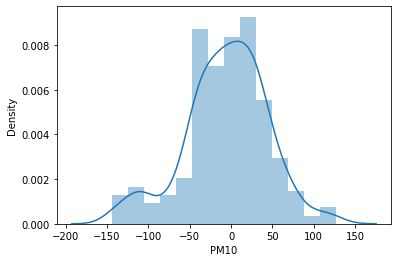

In [ ]:
#almost in the shape of bell curve, which follows gaussian distribution
sns.distplot(y_test-prediction)


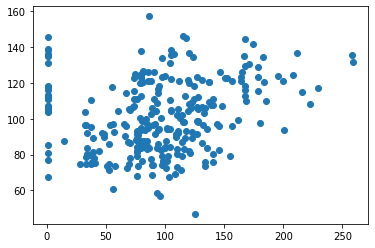

In [ ]:
# scatter plot
plt.scatter(y_test,prediction)

In [ ]:
from sklearn import metrics

In [ ]:
#computing mean absolute errror, mean squared error and root mean squared error
#the lesser the values Compared to other models, the better.
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 38.529547337201194
MSE: 2521.7619862103425
RMSE: 50.21714832813929


#Ridge Regression

In [ ]:
# Fitting the model with linear regression
# Retrieving negative mean squared error value to compare it with Ridge regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lin_regressor=LinearRegression()
mse=cross_val_score(lin_regressor,X,y,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-3387.451333349089


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [ ]:
#initialize the model
ridge=Ridge()
#initialize parameter alpha
parameters={'alpha':[1e-12,1e-10,1e-7,1e-6,1e-2,1,5,10,20,30,35,40]}

In [ ]:
#Gridsearch cv is taken for cross validation
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
#fitting the model
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-12, 1e-10, 1e-07, 1e-06, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [ ]:
#returns the best alpha value selected 
print(ridge_regressor.best_params_)
#returns means squared error
print(ridge_regressor.best_score_)

{'alpha': 40}
-3386.2312854230404


We observe, Linear regression score :-3387.451333349089.
There is minor difference and its better than linear regression

#Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [ ]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

Model Evaluation

Here the value is better than linear  and ridge regression,
Mean squared error : 3272.2986198299




In [ ]:
#predicting y using X_test
prediction=lasso_regressor.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


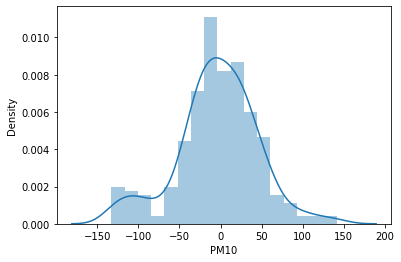

In [ ]:
#Bell curve looks better than the previous one
sns.distplot(y_test-prediction)


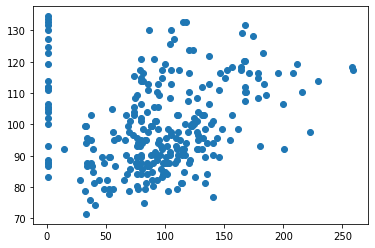

In [ ]:
#scatter plot
#the points are less scattered compared to the Linear Regression model
plt.scatter(y_test,prediction)


In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 37.20181943080947
MSE: 2447.2751404413393
RMSE: 49.469941787325155


When compared to linear regression error values, Lasso produces  less error values which means it's better.

#RandomForest Regressor

In [ ]:
#import random forest
from sklearn.ensemble import RandomForestRegressor


In [ ]:
#initializing the model
forestregressor=RandomForestRegressor()
forestregressor.fit(X_train,y_train)

RandomForestRegressor()

Model Evaluation

In [ ]:
prediction=forestregressor.predict(X_test)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


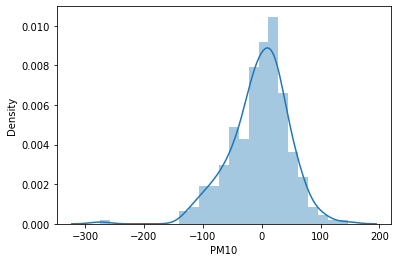

In [ ]:
#the bell curve is way better than the previous models, it follows gaussian distribution
sns.distplot(y_test-prediction)


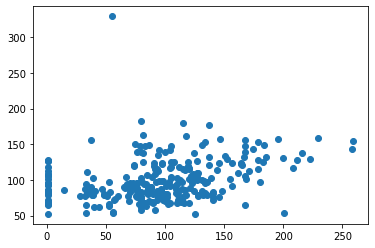

In [ ]:
plt.scatter(y_test,prediction)


Hyperparameter tuning


In [ ]:
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [ ]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [ ]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
#fitting the model
rf_random.fit(X_train,y_train)

In [ ]:
rf_random.best_params_


{'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 10,
 'min_samples_split': 5,
 'n_estimators': 400}

In [ ]:
rf_random.best_score_


-2986.605312895843

Model evaluation after hyperparameter tuning

In [ ]:
rfpredictions=rf_random.predict(X_test)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


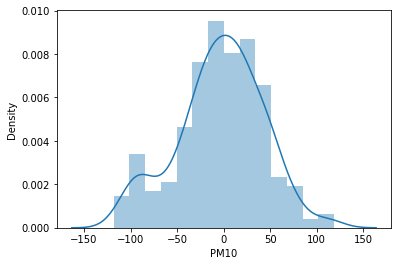

In [ ]:
sns.distplot(y_test-rfpredictions)


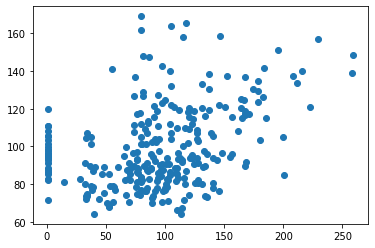

In [ ]:
plt.scatter(y_test,rfpredictions)


In [ ]:
# the the values are lesser than the previous models
print('MAE:', metrics.mean_absolute_error(y_test, rfpredictions))
print('MSE:', metrics.mean_squared_error(y_test, rfpredictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfpredictions)))



MAE: 36.200976475871805
MSE: 2149.7751416219157
RMSE: 46.36566770382926


In [ ]:
import pickle 

In [ ]:
#saving the model for future usage
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

#XGboost Regression

In [ ]:
import xgboost as xgb

In [ ]:
regressor2=xgb.XGBRegressor()
regressor2.fit(X_train,y_train)

Model Evaluation

In [ ]:
prediction=regressor.predict(X_test)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


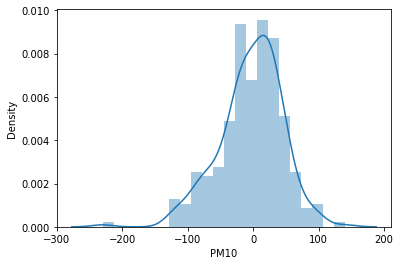

In [ ]:
sns.distplot(y_test-prediction)


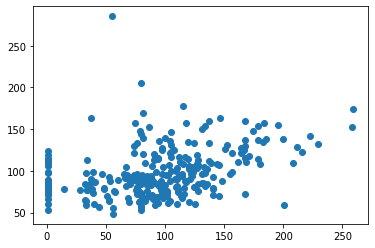

In [ ]:
plt.scatter(y_test,prediction)


Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [ ]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Various learning rate parameters
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
#Subssample parameter values
subsample=[0.7,0.6,0.8]
# Minimum child weight parameters
min_child_weight=[3,4,5,6,7]

In [ ]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
regressor1=xgb.XGBRegressor()

In [ ]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
xg_random = RandomizedSearchCV(estimator = regressor1, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = 1)


In [ ]:
xg_random.fit(X_train,y_train)


In [ ]:
xg_random.best_params_


{'learning_rate': '0.05',
 'max_depth': 15,
 'min_child_weight': 6,
 'n_estimators': 100,
 'subsample': 0.6}

In [ ]:
predictions=xg_random.predict(X_test)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


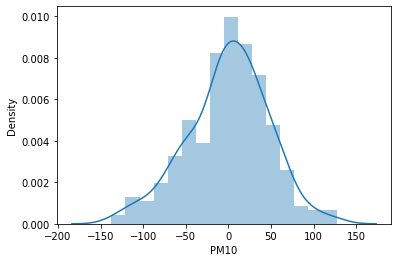

In [ ]:
sns.distplot(y_test-predictions)


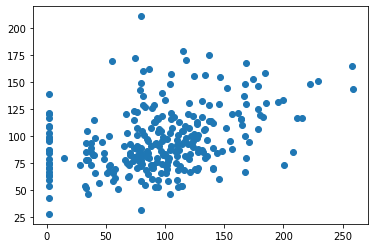

In [ ]:
plt.scatter(y_test,predictions)


In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))





MAE: 37.189550522288116
MSE: 2277.744296022101
RMSE: 47.72571943954434


In [ ]:
# open a file, where you ant to store the data
file = open('xgboost_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)